# Chapter 10: Optimizers

Once we have calculated the gradient, we can use this information to adjust weights and biases to decrease the measure of loss.

## 10.1. Stochastic Gradient Descent (SGD)

SGD is still a commonly used optimizer. Most optimizers are just variants of SGD.

<b>Stochastic Gradient Descent</b> is an optimizer that fits a single sample at a time.

<b>Batch Gradient Descent</b> is an optimizer that fits a whole dataset at once.

<b>Mini-batch Gradient Descent</b> is an optimizer that fits slices (batches) of a dataset.

Current naming trends and conventions with Stochastic Gradient Descent in use with deep learning today have merged and normalized all of these variants, such that a batch of data can be a single sample, every sample in a dataset, or some subset of the full dataset at a time.


-3.0
-3.0 2.0 6.0
6.0
6.0
1.0
1.0
1.0 1.0 1.0 1.0
-3.0 1.0 -1.0 -2.0 2.0 3.0
[-3.0, -1.0, 2.0] 1.0
[-3.001, -0.998, 1.997] 0.999
5.985
[[ 0.44  0.44  0.44]
 [-0.38 -0.38 -0.38]
 [-0.07 -0.07 -0.07]
 [ 1.37  1.37  1.37]]
[ 0.44 -0.38 -0.07  1.37]
[[ 0.44 -0.38 -0.07  0.5 ]
 [ 0.88 -0.76 -0.14  1.  ]
 [ 1.32 -1.14 -0.21  1.5 ]]
[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]
[[6. 6. 6.]]
[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]
[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]
[[ 0.21 -0.07 -0.14]
 [-0.07  0.09 -0.02]
 [-0.14 -0.02  0.16]]
Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradients: separate loss and activation:
[[-0.09999999  0.033

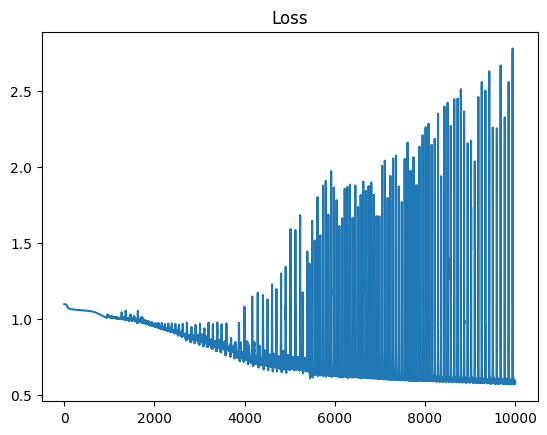

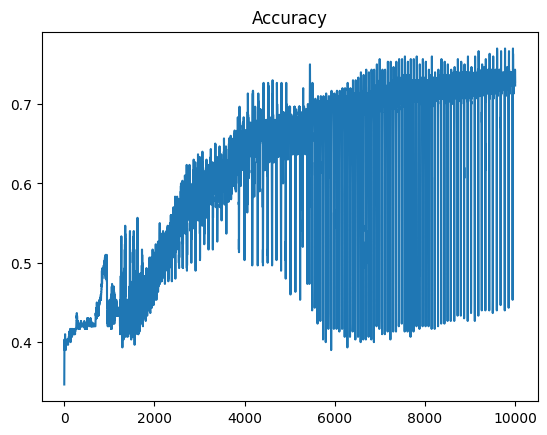

In [3]:
# To use all class, functions defined in another notebook:
%run 9_backpropagation.ipynb

class Optimizer_SGD:
    # Initialization method will take hyper-parameters, starting with learning_rate with default value of 1.
    def __init__ (self, learning_rate = 1.0):
        self.learning_rate = learning_rate      # storing hyper-parameters in the class' properties

    # Update parameters
    def update_params (self, layer):    # layer object contains its parameters (weights and biases) and also, at this stage, the gradient that is calculated during backpropagation
        layer.weights += - self.learning_rate * layer.dweights
        layer.biases += - self.learning_rate * layer.dbiases

        
# Create dataset
X, y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense(2, 64)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense(64, 3)

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create an optimizer object
optimizer = Optimizer_SGD()

# Train in loop

losses = []
accuracies = []

for epoch in range(10001):
    # --------------------- A forward pass --------------------------
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function, takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer, takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function, takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)
    
    # Calculate accuracy from output of activation2 and targets, calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1)

    if len(y.shape) == 2 :
        y = np.argmax(y, axis = 1)
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    if not epoch%100:
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f}')

    # --------------------- A backward pass (backpropagation) --------------------------
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # --------------------- Use optimizer to update weights and biases --------------------------
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

    
import matplotlib.pyplot as plt
plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()

Our neural network stays stuck around a loss of 1 and accuracy around 0.7.

The later part fluctuates trongly, this means the learning rate is too high, that causes the model to get stuck in a local minumum.

Iterating over more epochs does not seem helpful at this point, this means we're likely stuck with our optimization.

The learning rate (LR) is the primary adjustable parameter for the optimizer as it decreases loss.

To gain an intuition for adjusting, planning, or initially setting the learning rate, we should first understand how the learning rate affects the optimizer and output of the loss function.

## 10.2. Learning Rate

So far, we have a gradient of a model and the loss function with respect to all of the parameters, and we want to apply a fraction of this gradient to the parameters in order to descend the loss value.

Small steps ensure that we are following the direction of the steepest descent, but too small can cause <b>learning stagnation</b>.

The gradient descent is performed on the loss function of $n$-dimensional, where $n$ is the number of parameters (weights and biases) that the model contains.

For an easy visualization, we assume that the loss function has just one dimension (a singular input). Let's visualize some concepts and gain an intuition.

Here is the function where we want to determine what input to it will result in the lowest possible output:

<center><img src='./image/10-1.png' style='width: 70%'/><font color='gray'><i>Example function to minimize the output.</i></font></center>

We can find the global minimum of low-dimensional loss function with simple maths, but for $n$-dimensional loss function for NNs, where $n$ (the number of weights and biases) can be in the millions or even billions (or more), <b>gradient descent is the best-known way</b> to search for a global minimum.

Descending from the left side of the graph:

<center><img src='./image/10-2.png' style='width: 70%'/><font color='gray'><i>Stuck in the first local minimum.</i></font></center>

The learning rate seems to be too small, small updates to the parameters caused stagnation in the model's learning - the model got stuck in a local minimum.

Increase the learning rate:

<center><img src='./image/10-3.png' style='width: 70%'/><font color='gray'><i>Stuck in the second local minimum.</i></font></center>

The model escaped the first local minimum but got stuck at another one. 

Increase the learning rate:

<center><img src='./image/10-4.png' style='width: 70%'/><font color='gray'><i>Stuck in the third local minimum, near the global minimum.</i></font></center>

The model got stuck at a local minimum near the global minimum.

The model follows the direction of steepest descent of the loss function, no matter how large or slight the descent is.

Thus, we'll introduce <b>momentum</b> and the other techniques to prevent such situations.

<b>Momentum</b> in an optimizer adds to the gradient inertia - for example, we can throw a ball uphill and, with a small enough hill or big enough applied force, the ball can roll-over to the other side of the hill.

We used a very small learning rate with a large momentum. The model found the global minimum, but this took many steps.

<center><img src='./image/10-5.png' style='width: 70%'/><font color='gray'><i>Reached the global minimum, too low learning rate.</i></font></center>

Can this be done better?

<center><img src='./image/10-6.png' style='width: 70%'/><font color='gray'><i>Reached the global minimum, too low learning rate.</i></font></center>

Even better:

<center><img src='./image/10-7.png' style='width: 70%'/><font color='gray'><i>Reached the global minimum, significantly better learning rate.</i></font></center>

By modifying the learning rate and the momentum, we were able to find the global minimum in about 200, 100, and 50 steps.

However, hyper-parameter adjustments won't necessarily always help.

<center><img src='./image/10-8.png' style='width: 70%'/><font color='gray'><i>Unstable model, learning rate too big.</i></font></center>

If the learning rate set too high, the model might not be able to find the global minimum.

<center><img src='./image/10-9.png' style='width: 70%'/><font color='gray'><i>Unstable model, learning rate significantly too big.</i></font></center>

The model starts "jumping" around some minimum and moves in random directions, we should lower the learning rate, raise the momentum, or possibly apply a learning rate decay (lowering the learning rate during training).

The "overshooting", with every step - the direction of a change is correct, but the amount of the gradient applied is too large.

In an extreme situation, we could cause "a gradient explosion":

<center><img src='./image/10-10.png' style='width: 70%'/><font color='gray'><i>Broken model, learning rate critically too big.</i></font></center>

<b>A gradient explosion</b> is the rise instead of fall of the function's output when updating the parameter. 

At some point, the floating-point variable limitation causes an overflow as it cannot hold values of this size anymore, and the model is no longer able to train.

When we choose the LR and other hyper-parameters correctly, the learning process can be relatively quick.

<center><img src='./image/10-11.png' style='width: 70%'/><font color='gray'><i>Model learned, good learning rate, can be better.</i></font></center>

It took significantly less time for the model to find the global minimum, but it can always be better:

<center><img src='./image/10-12.png' style='width: 70%'/><font color='gray'><i>An efficient learning example.</i></font></center>

The challenge is to choose the right settings (hyper-parameters), it is not always an easy task. There is no single, best way to set hyper-parameters, but experience usually helps.

It's good to have the ability to update the optimizer's settings during training, start with the optimizer defaults, perform a few steps, observe the training process when tuning different settings.

<center><img src='./image/10-13.png' style='width: 70%'/><font color='gray'><i>Graphs of the loss in a function of steps, different rates.</i></font></center>

A good rule is that your initial training will benefit from a larger learning rate to take initial step faster.

If we start with too small steps, we can get stuck in a local minimum and be unable to leave it due to not making large enough updates to the parameters.

Let's try LR = 0.85 rather than 1.0:

epoch: 0 , acc: 0.340 , loss: 1.099
epoch: 100 , acc: 0.423 , loss: 1.086
epoch: 200 , acc: 0.410 , loss: 1.070
epoch: 300 , acc: 0.430 , loss: 1.067
epoch: 400 , acc: 0.423 , loss: 1.065
epoch: 500 , acc: 0.430 , loss: 1.063
epoch: 600 , acc: 0.440 , loss: 1.057
epoch: 700 , acc: 0.430 , loss: 1.047
epoch: 800 , acc: 0.433 , loss: 1.034
epoch: 900 , acc: 0.393 , loss: 1.034
epoch: 1000 , acc: 0.397 , loss: 1.023
epoch: 1100 , acc: 0.417 , loss: 1.017
epoch: 1200 , acc: 0.437 , loss: 1.008
epoch: 1300 , acc: 0.457 , loss: 1.001
epoch: 1400 , acc: 0.467 , loss: 0.995
epoch: 1500 , acc: 0.483 , loss: 0.989
epoch: 1600 , acc: 0.500 , loss: 0.982
epoch: 1700 , acc: 0.463 , loss: 1.000
epoch: 1800 , acc: 0.467 , loss: 0.975
epoch: 1900 , acc: 0.493 , loss: 0.976
epoch: 2000 , acc: 0.500 , loss: 0.978
epoch: 2100 , acc: 0.477 , loss: 0.964
epoch: 2200 , acc: 0.480 , loss: 0.969
epoch: 2300 , acc: 0.493 , loss: 0.967
epoch: 2400 , acc: 0.507 , loss: 0.954
epoch: 2500 , acc: 0.483 , loss: 0.95

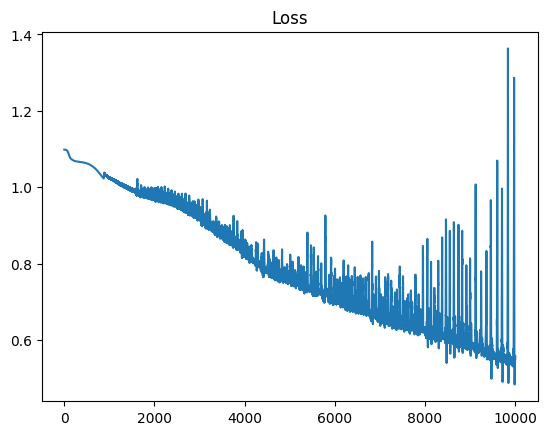

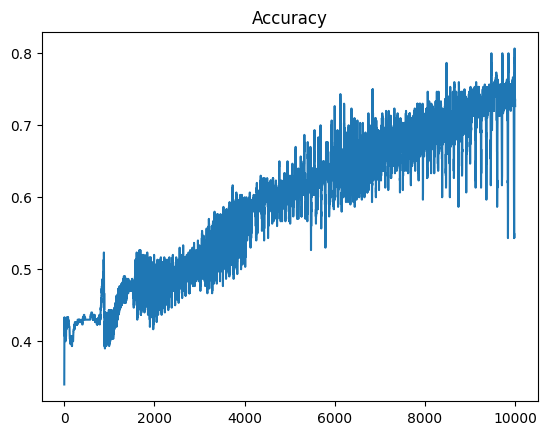

In [6]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense( 2 , 64 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 64 , 3 )

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD( learning_rate = .85 )

losses = []
accuracies = []

# Train in loop
for epoch in range ( 10001 ):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1 )

    if len (y.shape) == 2 :
        y = np.argmax(y, axis = 1 )
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    if not epoch % 100 :
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

    
plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()

The NN did slightly better in terms of accuracy, and it achieved a lower loss, lower loss is not always associated with higher accuracy.

Even if we desire the best accuracy, the optimizer's task is to decrease loss, not raise accuracy directly.

In most cases, we start with a larger learning rate and decrease it over time/steps, called a learning rate decay.


## 10.3. Learning Rate Decay

Two ways to decrease the learning rate (1) tracking the loss over time and manually decrease the LR when appropriate, and (2) programing a decay rate which steadily decays the LR per batch or epoch.

Let's plan to decay per step, as $1/t$ decaying or exponential decaying.

Initially, the learning rate drops fast, but the change in the learning rate lowers each step, letting the model sit as close as possible to the minimum.

In [9]:
starting_learning_rate = 1.
learning_rate_decay = 0.1

for step in range(20):
    learning_rate = starting_learning_rate * (1. / (1 + learning_rate_decay * step))    # 1+ to ensure algorithm never rises the learning rate
    print(learning_rate)

1.0
0.9090909090909091
0.8333333333333334
0.7692307692307692
0.7142857142857143
0.6666666666666666
0.625
0.588235294117647
0.5555555555555556
0.5263157894736842
0.5
0.47619047619047616
0.45454545454545453
0.4347826086956522
0.41666666666666663
0.4
0.3846153846153846
0.37037037037037035
0.35714285714285715
0.3448275862068965


The model needs small updates near the end of training to be able to get as close to this point as possible.

We can now update our SGD optimizer class to allow for the learning rate decay:

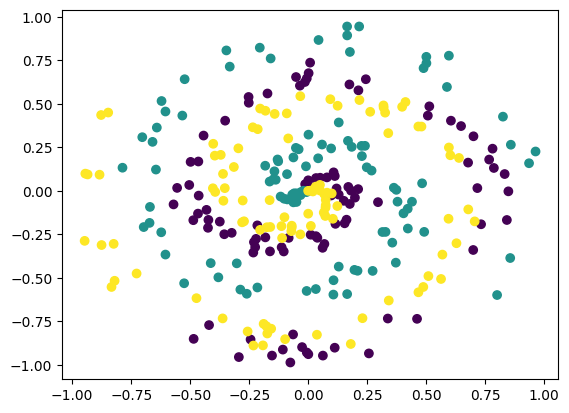

epoch: 0 , acc: 0.380 , loss: 1.099 , lr: 1.0
epoch: 100 , acc: 0.387 , loss: 1.091 , lr: 0.5025125628140703
epoch: 200 , acc: 0.387 , loss: 1.079 , lr: 0.33444816053511706
epoch: 300 , acc: 0.387 , loss: 1.074 , lr: 0.2506265664160401
epoch: 400 , acc: 0.390 , loss: 1.072 , lr: 0.2004008016032064
epoch: 500 , acc: 0.393 , loss: 1.071 , lr: 0.1669449081803005
epoch: 600 , acc: 0.400 , loss: 1.071 , lr: 0.14306151645207438
epoch: 700 , acc: 0.400 , loss: 1.070 , lr: 0.1251564455569462
epoch: 800 , acc: 0.397 , loss: 1.070 , lr: 0.11123470522803114
epoch: 900 , acc: 0.397 , loss: 1.070 , lr: 0.10010010010010009
epoch: 1000 , acc: 0.400 , loss: 1.070 , lr: 0.09099181073703366
epoch: 1100 , acc: 0.400 , loss: 1.069 , lr: 0.08340283569641367
epoch: 1200 , acc: 0.400 , loss: 1.069 , lr: 0.07698229407236336
epoch: 1300 , acc: 0.400 , loss: 1.069 , lr: 0.07147962830593281
epoch: 1400 , acc: 0.400 , loss: 1.069 , lr: 0.066711140760507
epoch: 1500 , acc: 0.400 , loss: 1.069 , lr: 0.0625390869293

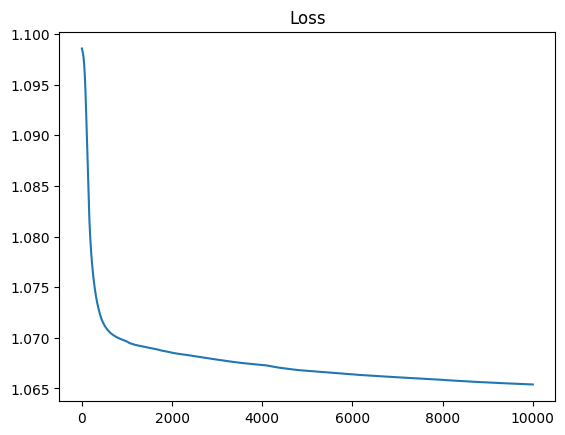

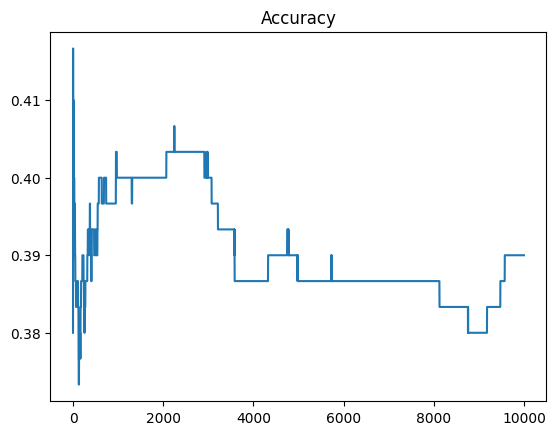

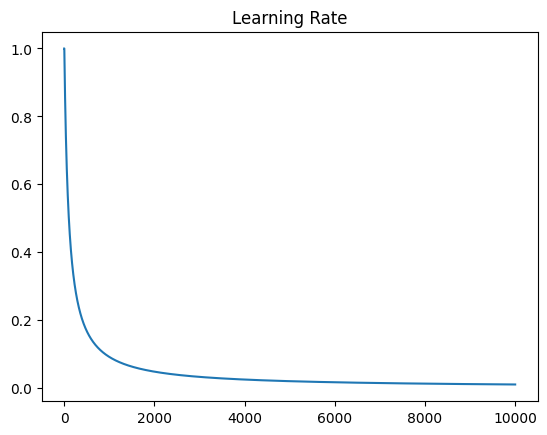

In [24]:
# SGD optimizer
class Optimizer_SGD :

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__ ( self , learning_rate = 1. , decay = 0. ):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0

    # Call once before any parameter updates
    def pre_update_params ( self ):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                ( 1. / ( 1. + self.decay * self.iterations))

    # Update parameters
    def update_params ( self , layer ):
        layer.weights += - self.current_learning_rate * layer.dweights
        layer.biases += - self.current_learning_rate * layer.dbiases

    # Call once after any parameter updates
    def post_update_params ( self ):
        self.iterations += 1


# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense( 2 , 64 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 64 , 3 )

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD( decay = 1e-2 )

losses = []
accuracies = []
learning_rates = []

# Train in loop
for epoch in range ( 10001 ):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1 )
    if len (y.shape) == 2 :
        y = np.argmax(y, axis = 1 )
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    learning_rates.append(optimizer.current_learning_rate)
    if not epoch % 100 :
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f} , lr: {optimizer.current_learning_rate}')
    
    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()
plt.plot(range(10001), learning_rates)
plt.title('Learning Rate')
plt.show()

This model definitely got stuck, the reason is because the learning rate decayed far too quickly and became too small, trapping the model in some local minimum. That's why rather than wiggling, our accuracy and loss stopped changing at all.

We try to decay a bit slower by making our decay a smaller number. Let's go with 1e-3 (0.001):

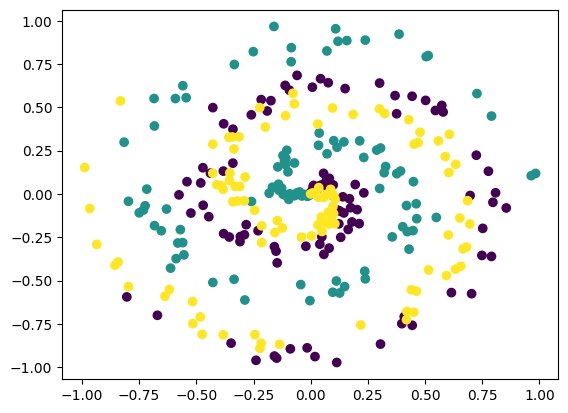

epoch: 0 , acc: 0.367 , loss: 1.099 , lr: 1.0
epoch: 100 , acc: 0.437 , loss: 1.076 , lr: 0.9099181073703367
epoch: 200 , acc: 0.440 , loss: 1.065 , lr: 0.8340283569641367
epoch: 300 , acc: 0.443 , loss: 1.063 , lr: 0.7698229407236336
epoch: 400 , acc: 0.433 , loss: 1.062 , lr: 0.7147962830593281
epoch: 500 , acc: 0.430 , loss: 1.061 , lr: 0.66711140760507
epoch: 600 , acc: 0.420 , loss: 1.060 , lr: 0.6253908692933083
epoch: 700 , acc: 0.423 , loss: 1.058 , lr: 0.5885815185403178
epoch: 800 , acc: 0.427 , loss: 1.056 , lr: 0.5558643690939411
epoch: 900 , acc: 0.433 , loss: 1.053 , lr: 0.526592943654555
epoch: 1000 , acc: 0.433 , loss: 1.049 , lr: 0.5002501250625312
epoch: 1100 , acc: 0.427 , loss: 1.045 , lr: 0.4764173415912339
epoch: 1200 , acc: 0.437 , loss: 1.039 , lr: 0.45475216007276037
epoch: 1300 , acc: 0.447 , loss: 1.033 , lr: 0.43497172683775553
epoch: 1400 , acc: 0.443 , loss: 1.026 , lr: 0.4168403501458941
epoch: 1500 , acc: 0.453 , loss: 1.019 , lr: 0.4001600640256102
epoc

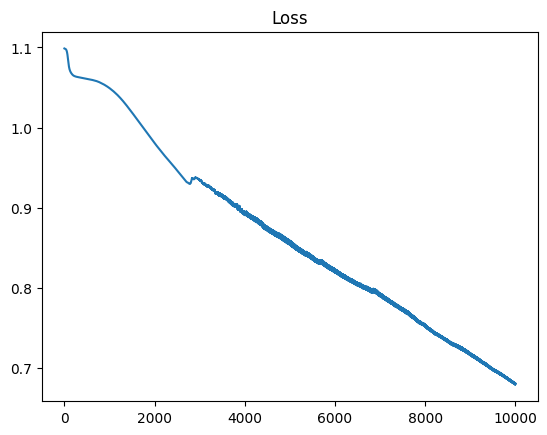

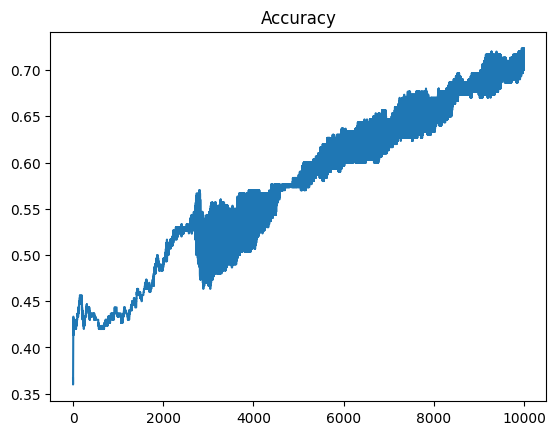

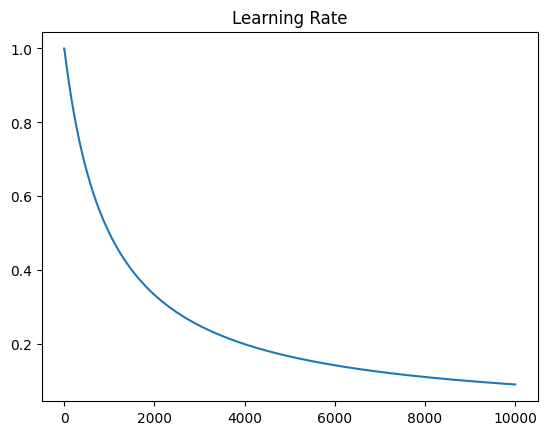

In [25]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense( 2 , 64 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 64 , 3 )

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD( decay = 1e-3 )

losses = []
accuracies = []
learning_rates = []

# Train in loop
for epoch in range ( 10001 ):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1 )

    if len (y.shape) == 2 :
        y = np.argmax(y, axis = 1 )

    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    learning_rates.append(optimizer.current_learning_rate)
    if not epoch % 100 :
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f} , lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()
plt.plot(range(10001), learning_rates)
plt.title('Learning Rate')
plt.show()

We've achieved our lowest lost and highest accuracy thus far, but still need to find parameters for even better results.

For example, we may suspect that the initial learning rate is too high, feel free to try to find better settings!

<b>Stochastic Gradient Descent</b> with learning rate decay can do fairly well but it still a fairly basic optimization method that only follows a gradient without any additional logic that could potentially help the model find the global minimum to the loss function.

One option for improving the SGD optimizer is to introduce momentum.


## 10.4. Stochastic Gradient Descent with Momentum

With momentum, a model is more likely to pass through local minimums, futher decreasing loss.

Momentum still point towards the global gradient descent direction.

<center><img src='./image/10-14.png' style='width: 70%'/><font color='gray'><i>Recall the situation from the beginning of this chapter.</i></font></center>

Momentum uses the previous update’s direction to influence the next update’s direction, minimizing the chances of bouncing around and getting stuck.

<center><img src='./image/10-15.png' style='width: 70%'/><font color='gray'><i>Recall another example shown in this chapter.</i></font></center>

In [26]:
# SGD optimizer
class Optimizer_SGD:

    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1., decay=0., momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    # Call once before any parameter updates
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                (1. / (1. + self.decay * self.iterations))

    # Update parameters
    def update_params(self, layer):

        # If we use momentum
        if self.momentum:

            # If layer does not contain momentum arrays, create them
            # filled with zeros
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                # If there is no momentum array for weights
                # The array doesn't exist for biases yet either.
                layer.bias_momentums = np.zeros_like(layer.biases)

            # Build weight updates with momentum - take previous
            # updates multiplied by retain factor and update with current gradients
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            # Build bias updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        # Vanilla SGD updates (as before momentum update)
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases

        # Update weights and biases using either
        # vanilla or momentum updates
        layer.weights += weight_updates
        layer.biases += bias_updates

    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1


Let’s show an example illustrating how adding momentum changes the learning process. Keeping the same starting learning rate (1) and decay (1e-3) from the previous training attempt and using a momentum of 0.5, momentum = 0.9 return even better results:

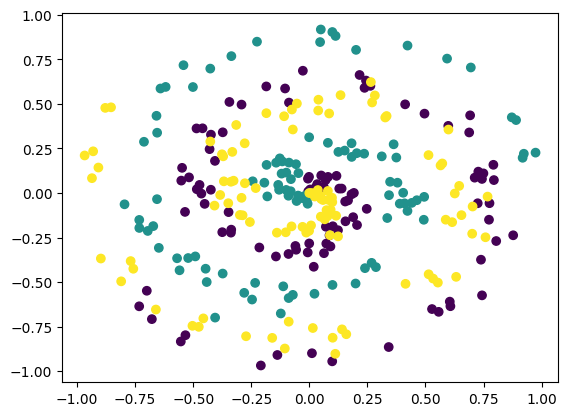

epoch: 0 , acc: 0.273 , loss: 1.099 , lr: 1.0
epoch: 100 , acc: 0.403 , loss: 1.037 , lr: 0.9099181073703367
epoch: 200 , acc: 0.480 , loss: 0.937 , lr: 0.8340283569641367
epoch: 300 , acc: 0.627 , loss: 0.751 , lr: 0.7698229407236336
epoch: 400 , acc: 0.753 , loss: 0.548 , lr: 0.7147962830593281
epoch: 500 , acc: 0.773 , loss: 0.466 , lr: 0.66711140760507
epoch: 600 , acc: 0.777 , loss: 0.434 , lr: 0.6253908692933083
epoch: 700 , acc: 0.793 , loss: 0.415 , lr: 0.5885815185403178
epoch: 800 , acc: 0.807 , loss: 0.397 , lr: 0.5558643690939411
epoch: 900 , acc: 0.803 , loss: 0.383 , lr: 0.526592943654555
epoch: 1000 , acc: 0.807 , loss: 0.374 , lr: 0.5002501250625312
epoch: 1100 , acc: 0.797 , loss: 0.368 , lr: 0.4764173415912339
epoch: 1200 , acc: 0.793 , loss: 0.363 , lr: 0.45475216007276037
epoch: 1300 , acc: 0.807 , loss: 0.359 , lr: 0.43497172683775553
epoch: 1400 , acc: 0.813 , loss: 0.356 , lr: 0.4168403501458941
epoch: 1500 , acc: 0.820 , loss: 0.353 , lr: 0.4001600640256102
epoc

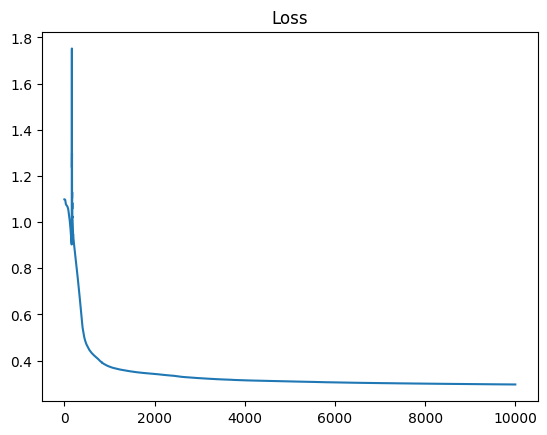

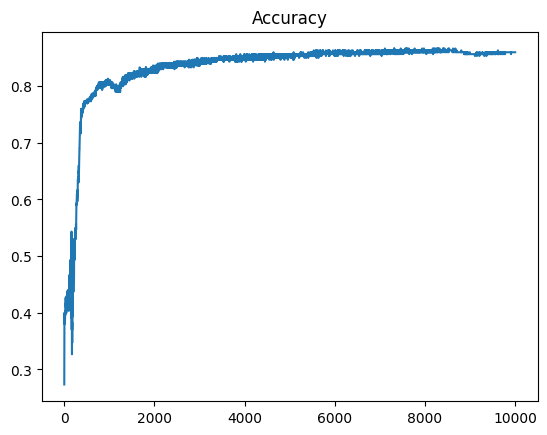

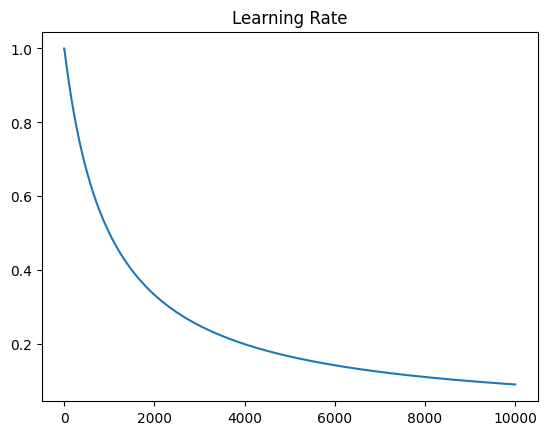

In [31]:
# Create dataset
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Create Dense layer with 2 input features and 64 output values
dense1 = Layer_Dense( 2 , 64 )

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

# Create second Dense layer with 64 input features (as we take output
# of previous layer here) and 3 output values (output values)
dense2 = Layer_Dense( 64 , 3 )

# Create Softmax classifier's combined loss and activation
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

# Create optimizer
optimizer = Optimizer_SGD( decay = 1e-3 , momentum = 0.9 )

losses = []
accuracies = []
learning_rates = []

# Train in loop
for epoch in range ( 10001 ):
    # Perform a forward pass of our training data through this layer
    dense1.forward(X)

    # Perform a forward pass through activation function
    # takes the output of first dense layer here
    activation1.forward(dense1.output)

    # Perform a forward pass through second Dense layer
    # takes outputs of activation function of first layer as inputs
    dense2.forward(activation1.output)

    # Perform a forward pass through the activation/loss function
    # takes the output of second dense layer here and returns loss
    loss = loss_activation.forward(dense2.output, y)
    losses.append(loss)

    # Calculate accuracy from output of activation2 and targets
    # calculate values along first axis
    predictions = np.argmax(loss_activation.output, axis = 1 )

    if len (y.shape) == 2 :
        y = np.argmax(y, axis = 1 )
    
    accuracy = np.mean(predictions == y)
    accuracies.append(accuracy)
    
    learning_rates.append(optimizer.current_learning_rate)
    if not epoch % 100 :
        print(f'epoch: {epoch} , acc: {accuracy :.3f} , loss: {loss :.3f} , lr: {optimizer.current_learning_rate}')

    # Backward pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()
    
plt.plot(range(10001), losses)
plt.title('Loss')
plt.show()
plt.plot(range(10001), accuracies)
plt.title('Accuracy')
plt.show()
plt.plot(range(10001), learning_rates)
plt.title('Learning Rate')
plt.show()

This is a decent enough example of how momentum can prove useful. The model achieved an accuracy of almost 88% in the first 1000 epochs and improved further, ending with an accuracy of 93.3% and a loss of 0.173. 

These results are a great improvement.

The SGD optimizer with momentum is usually one of 2 main choices for an optimizer in practice next to the Adam optimizer.

The next modification to Stochastic Gradient Descent is AdaGrad

